Here I continue applying different regularization to account for the beam orbit in the ML and also to keep the it at nanometer level at the exit.

This time I check the knob Y4. From the previous calculations, it converged well with less than 20 elements.

In [2]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [1]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [27]:
y4_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(9)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y4_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y4_summary_dict['iteration'].append(i)
    y4_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y4_summary_dict['score'].append(tmp_sorted.score.values[0])
    y4_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y4_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y4_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y4_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y4_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y4_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(tmp_sorted.weights.values[0].ravel())

y4_summary = pd.DataFrame(y4_summary_dict)

y4_summary['problem_loss'] = y4_summary.total_loss - y4_summary.orbit_loss - y4_summary.zero_loss - y4_summary.exit_orbit_loss

print(y4_summary)

100%|██████████| 9/9 [00:00<00:00, 32.94it/s]

   iteration  n_features     score  \
0          0           3  0.723858   
1          1           4  0.905389   
2          2           5  0.917524   
3          3           6  0.940562   
4          4           7  0.953176   
5          5           8  0.954122   
6          6           9  0.954275   
7          7          10  0.956314   
8          8          11  0.956644   

                                             weights  \
0           [[-1.0233207], [-1.0248201], [0.870031]]   
1  [[-1.0102707], [-1.0074515], [1.8530769], [-1....   
2  [[-16.686167], [-5.03312], [1.8280748], [-1.00...   
3  [[-20.188837], [-6.0826254], [2.9828954], [-4....   
4  [[-20.47959], [-6.181927], [1.0256641], [-6.55...   
5  [[-20.634987], [-6.2230434], [1.0050874], [-6....   
6  [[-20.725388], [-5.951438], [1.0033137], [-6.2...   
7  [[-20.788933], [-5.968662], [1.0051261], [-7.2...   
8  [[-20.606558], [-6.172065], [1.0028408], [-7.2...   

                                            features    to

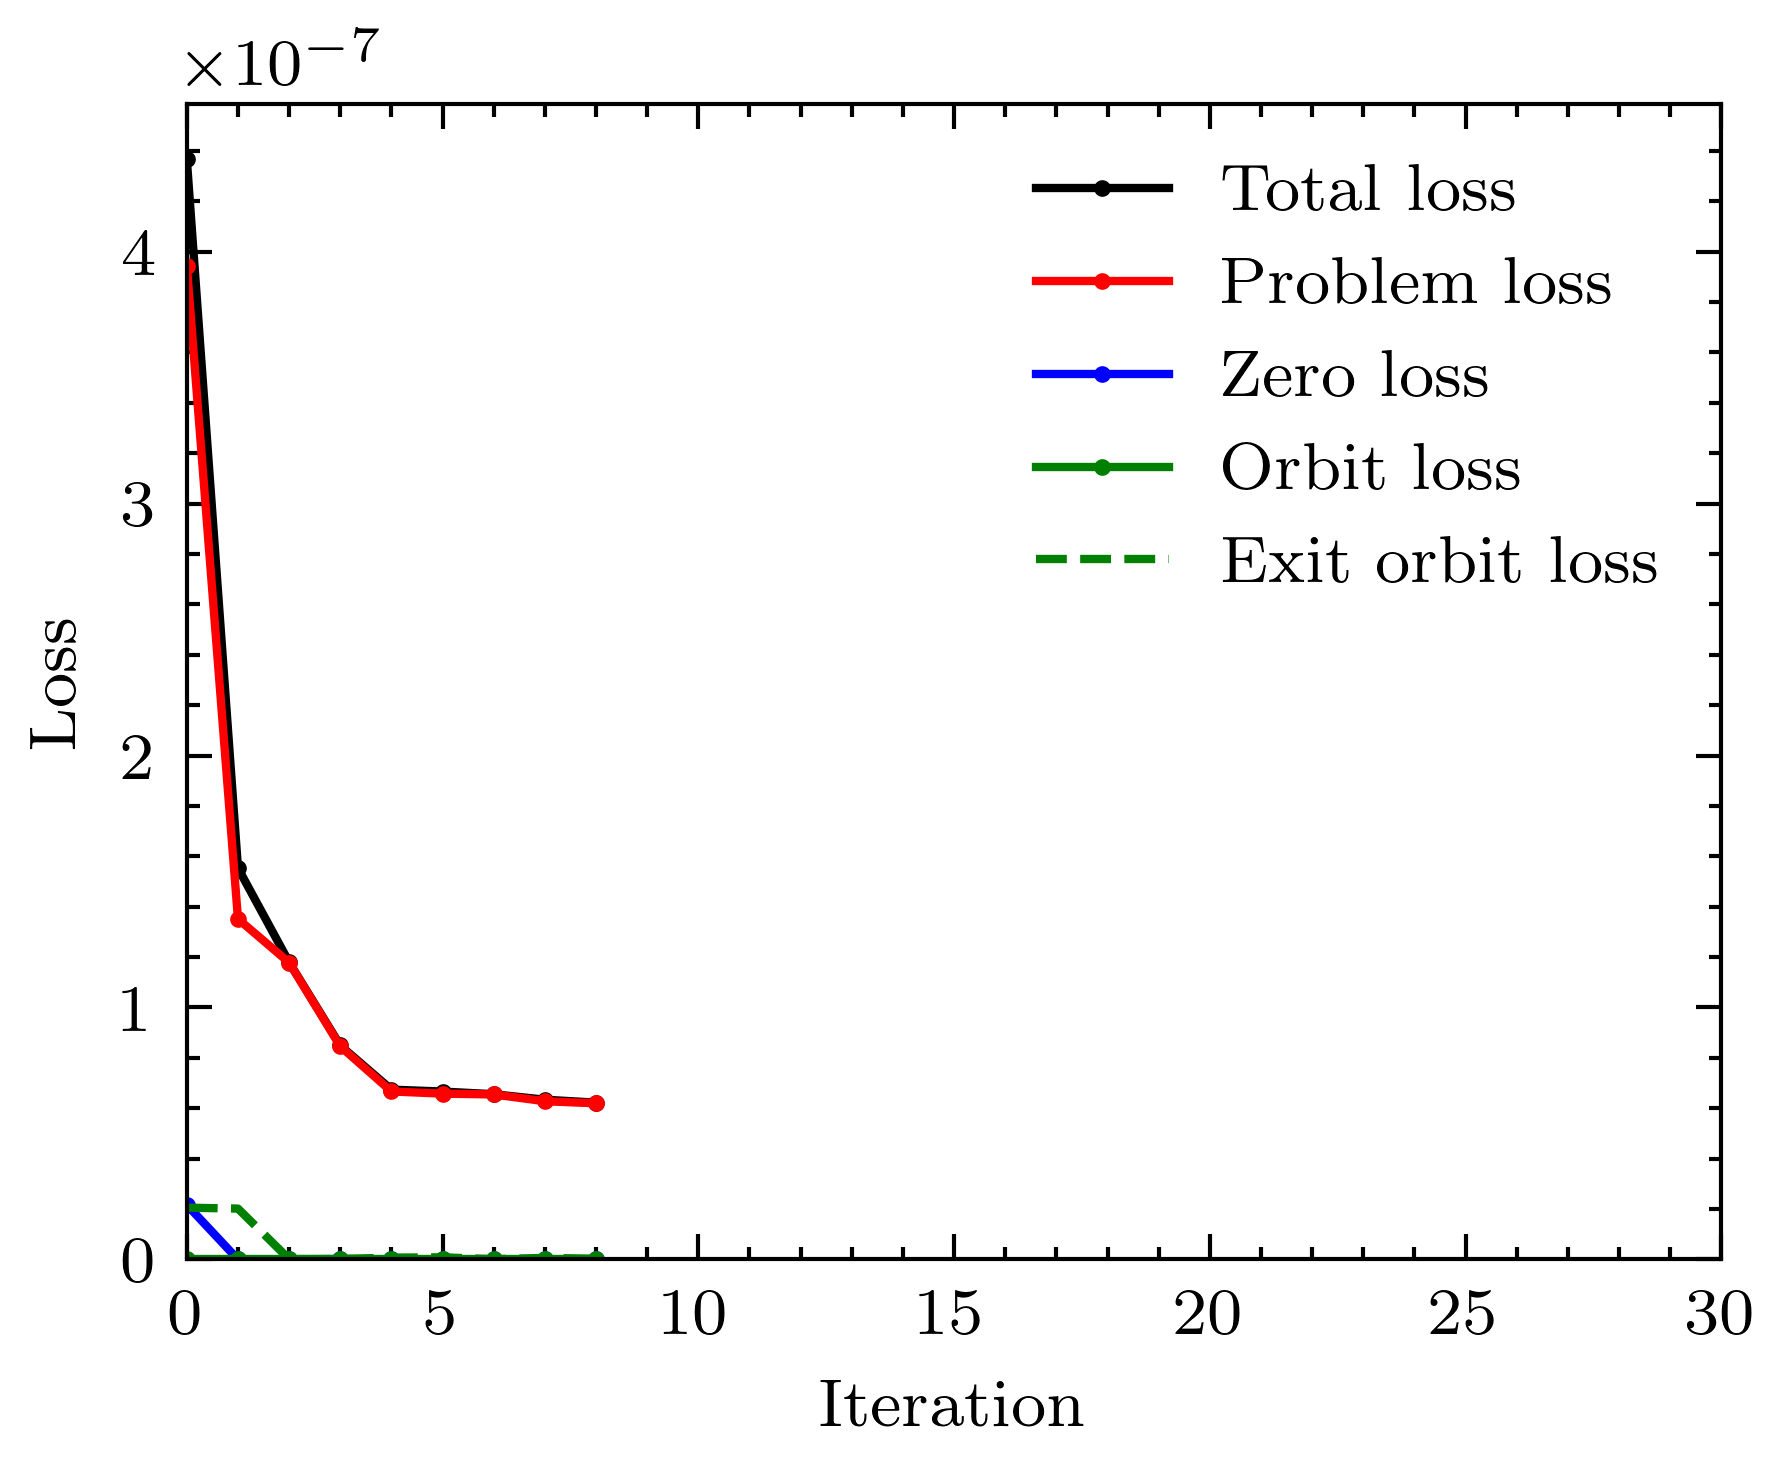

In [28]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y4_summary.iteration, y4_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y4_summary.iteration, y4_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y4_summary.iteration, y4_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y4_summary.iteration, y4_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y4_summary.iteration, y4_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

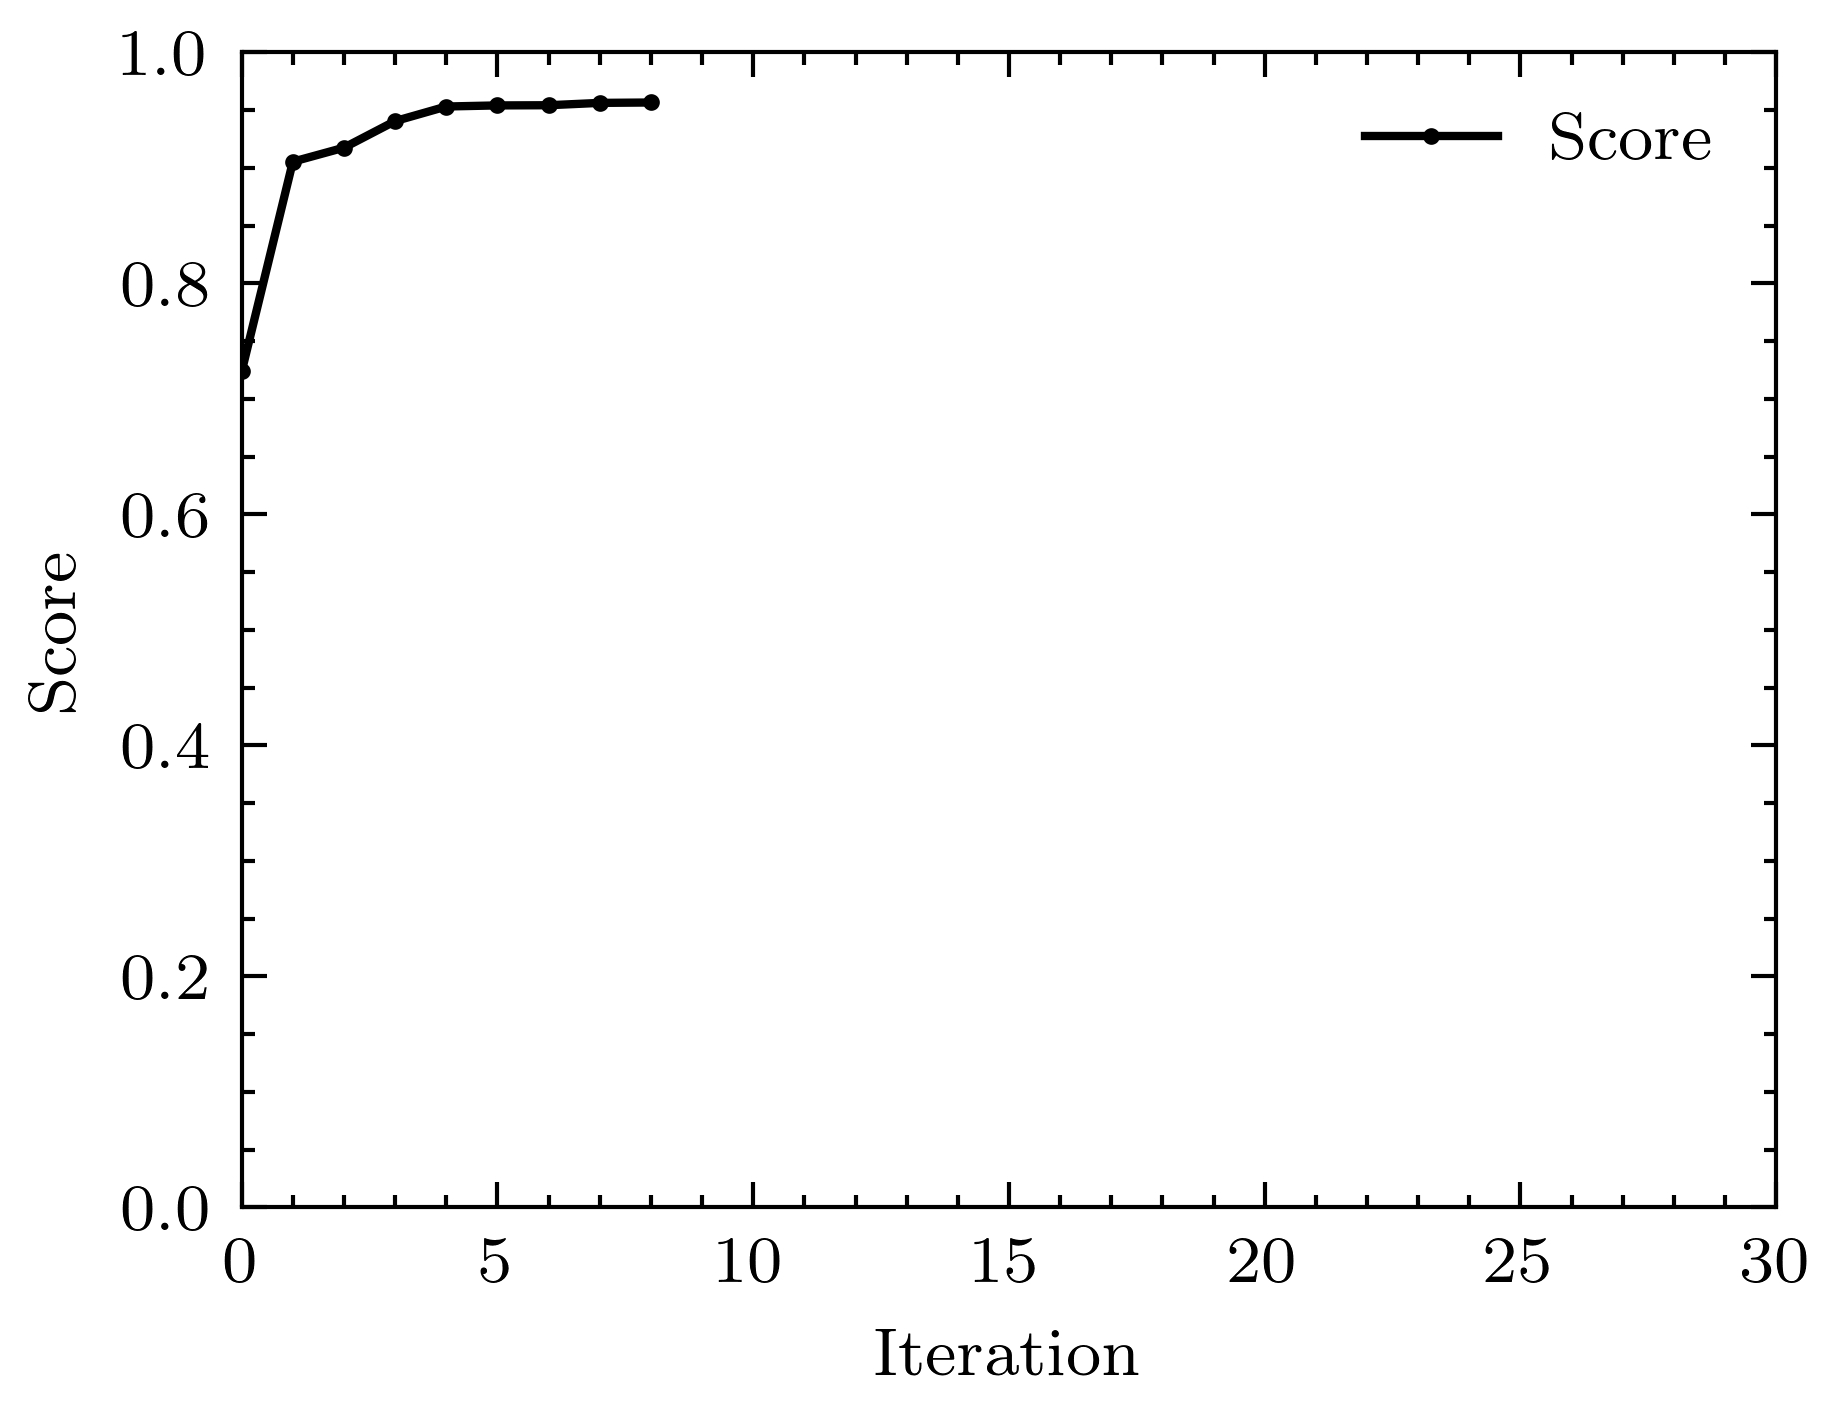

In [29]:
with plt.style.context(['science', 'ieee']):
#    plt.plot(y8_summary.n_features, y8_summary.total_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y4_summary.iteration, y4_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

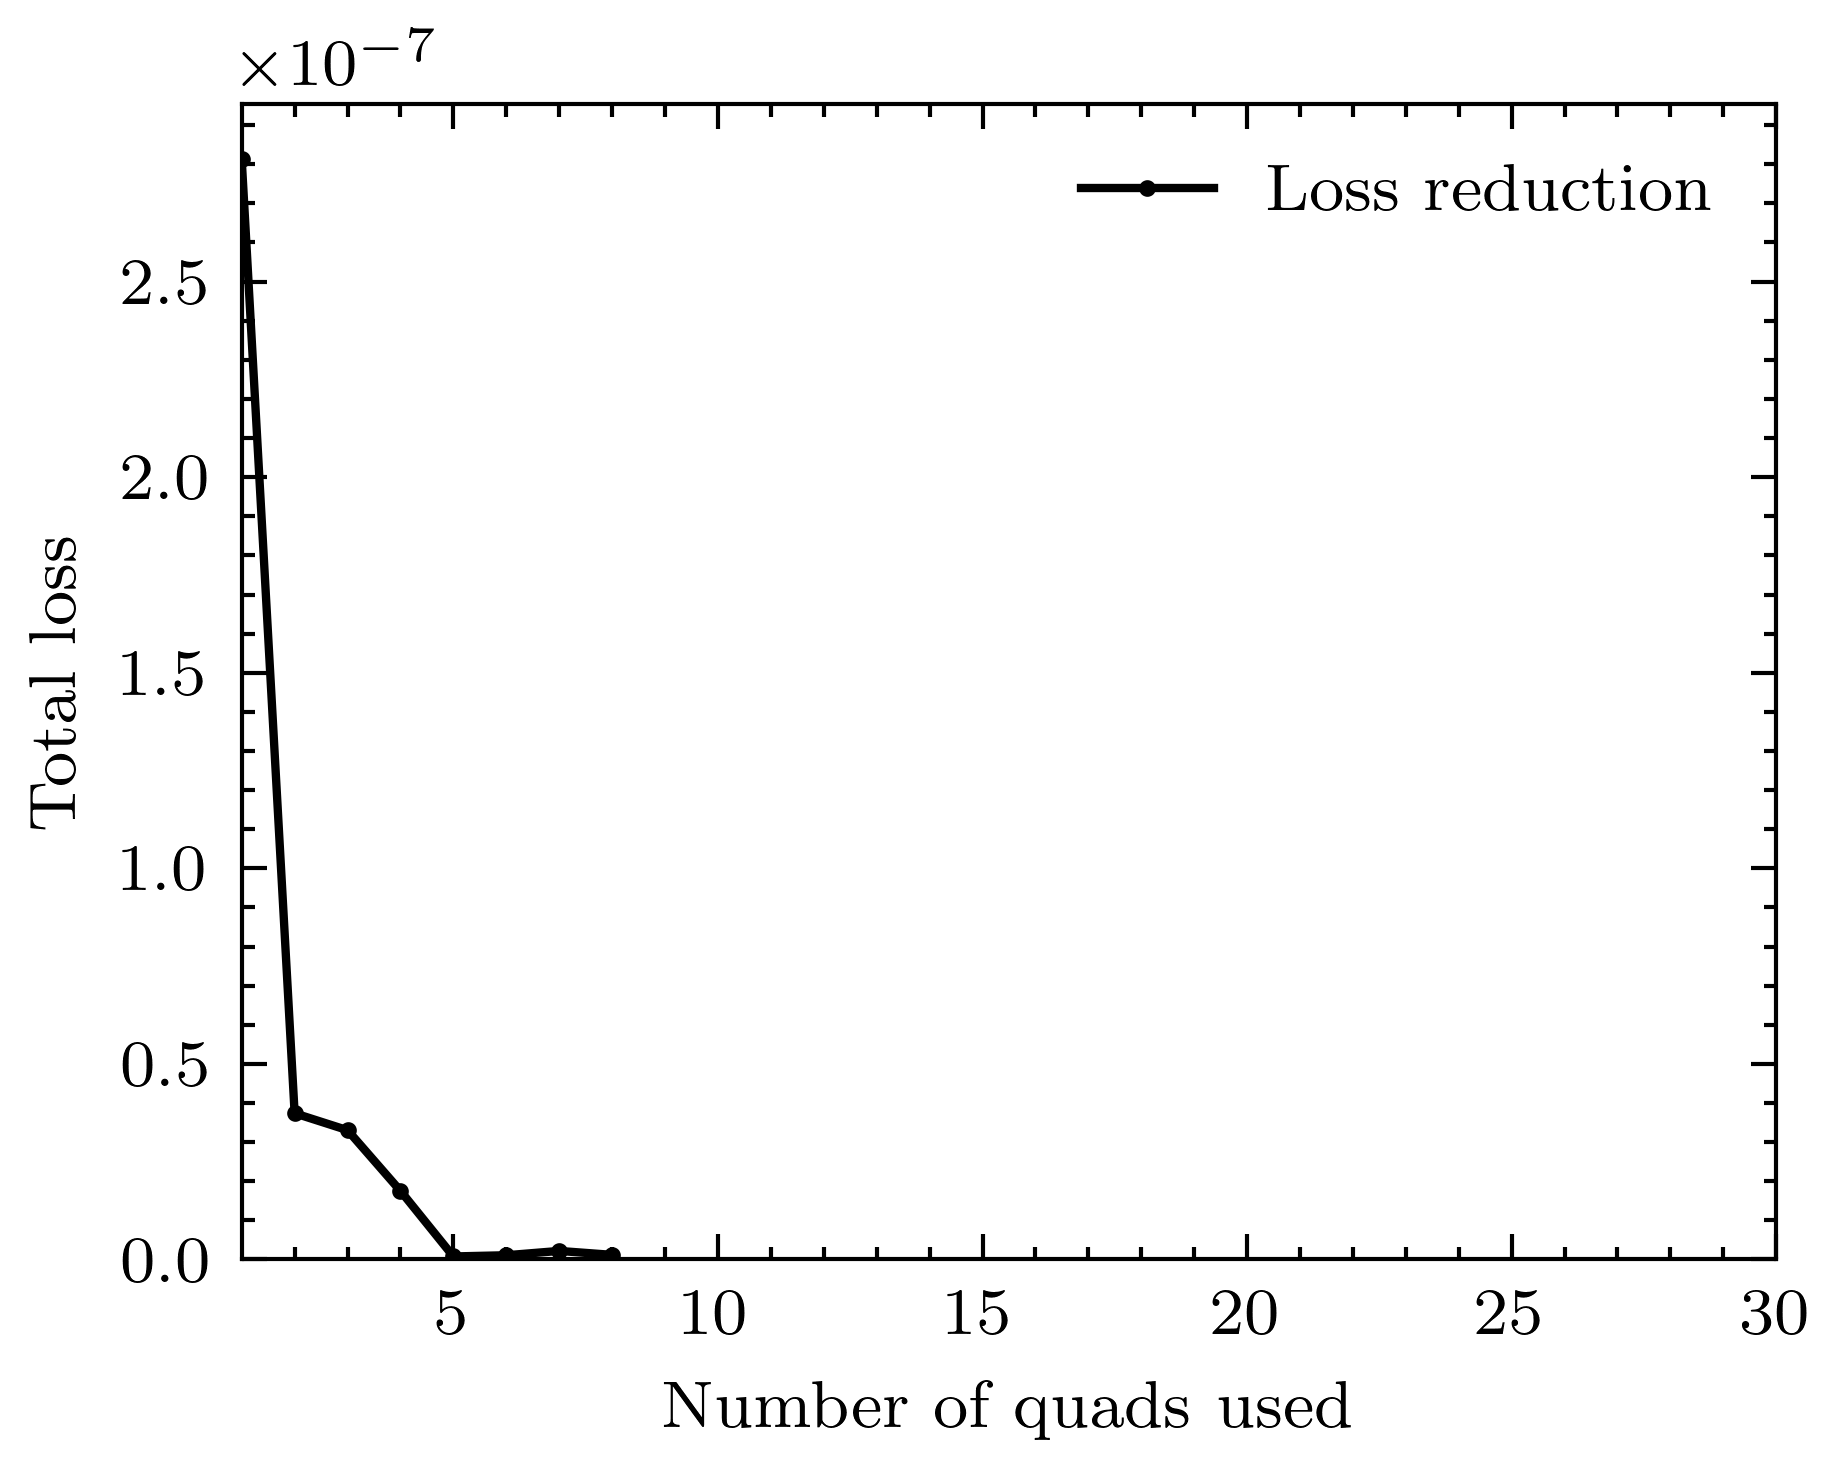

In [31]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y4_summary.total_loss)):
    loss_reduction.append(y4_summary.total_loss[i - 1] - y4_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y4_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
    plt.ylim(0, )
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

In [32]:
import placetmachine as pl

In [33]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [38]:
knobs_setup = {
    "Y4": f"data/learning_storage/orbit_supression_2/Y4_sfs1_it6",
}

In [39]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [40]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[-20.725388, -5.951438, 1.0033137, -6.2002664, -6.281371, 1.0087113, 1.2091062, -1.00304, -1.0033016] [2061, 2062, 1493, 1515, 2060, 1526, 1504, 1489, 2059]
  name        type  girder           s    x          y   xp   yp
0       Quadrupole    1481  3466.28456  0.0 -20.725388  0.0  0.0
1       Quadrupole    1485  3475.65118  0.0  -5.951438  0.0  0.0
2       Quadrupole       5     9.57496  0.0   1.003314  0.0  0.0
3       Quadrupole      27    61.05474  0.0  -6.200266  0.0  0.0
4       Quadrupole    1477  3456.91794  0.0  -6.281371  0.0  0.0
5       Quadrupole      38    86.79463  0.0   1.008711  0.0  0.0
6       Quadrupole      16    35.31485  0.0   1.209106  0.0  0.0
7       Quadrupole       1     0.21500  0.0  -1.003040  0.0  0.0
8       Quadrupole    1473  3447.55132  0.0  -1.003302  0.0  0.0


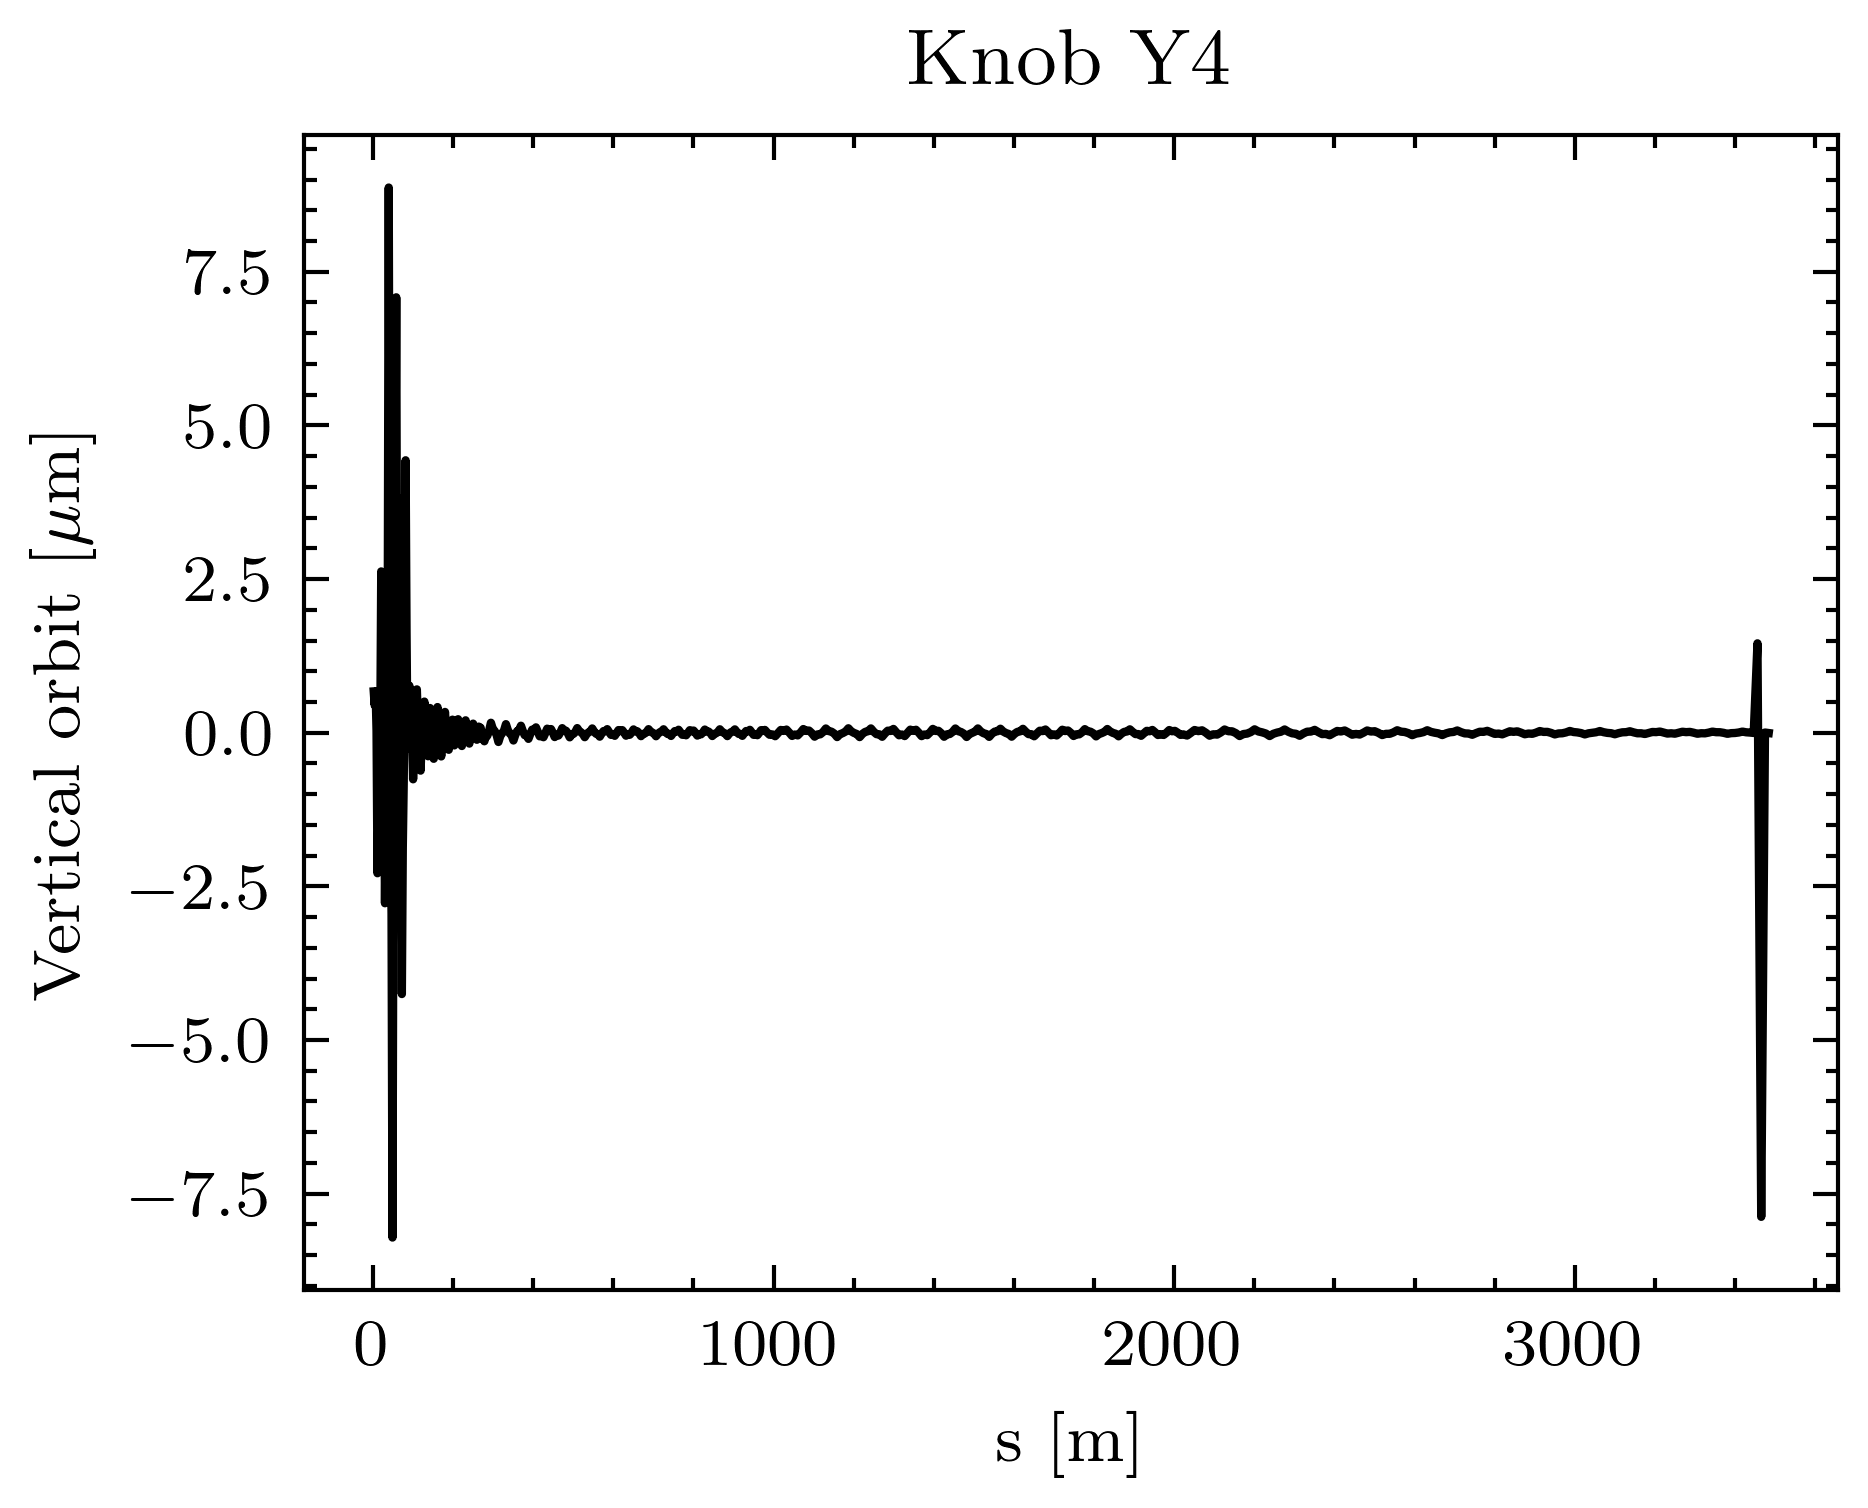

The last 2 BPMs orbit 2.8395400000000004 nm and -5.40772 nm


In [41]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y4")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")